<a href="https://colab.research.google.com/github/theniosoares/na/blob/main/trab_as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: CAIDA (Center for Applied Internet Data Analysis) AS (Autonomous Systems) Relationships Datasets, from 1/04-11/07

Dataset information - CAIDA AS Relationships Datasets: 2004 - 2007
http://www.caida.org/data/active/as-relationships/
RouteViews BGP table snapshots

NODES:

EDGES:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
ascaida = pd.read_csv("https://raw.githubusercontent.com/theniosoares/na/master/as-caida.csv", skiprows=2, header=None, delimiter=" ")
ascaida.columns = ["asn1", "asn2", "weight"]
G = nx.Graph()
for row in ascaida.iterrows():
    #G.add_edge(row[1]["asn1"], row[1]["asn2"])
    G.add_edge(row[1]["asn1"], row[1]["asn2"], weight=row[1]["weight"])

for n, d in G.nodes(data=True):
    G.nodes[n]["degree"] = G.degree(n)

ascaida

,asn1,asn2,weight
0,1041,3,3
1,4953,3,3
2,19248,3,1
3,130,4,3
4,202,4,3
...,...,...,...
106755,156,31349,3
106756,1684,31349,2
106757,156,31356,3
106758,161,31361,3


In [4]:
print(G)

Graph with 26475 nodes and 53381 edges


In [5]:
!pip install nxviz

In [6]:
import warnings
import nxviz as nv
from nxviz import annotate

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [7]:
adj_matrix = nx.adjacency_matrix(G).todense()
print(adj_matrix)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


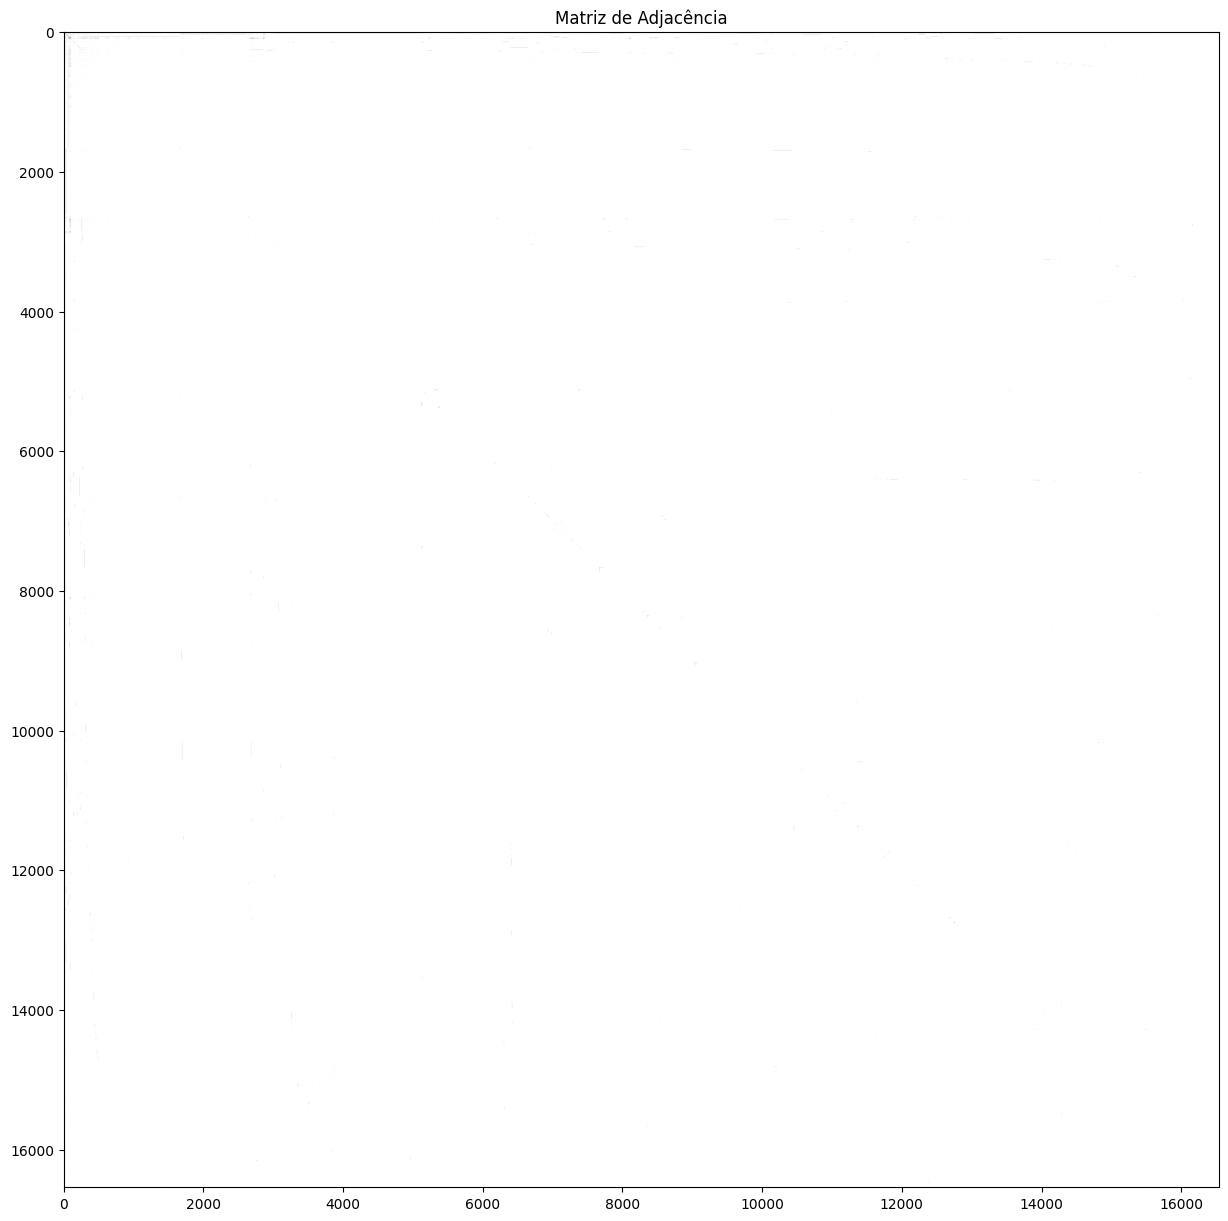

In [8]:
min = 2  #limite mínimo de grau para seleção de nós

#filtrando
selec = [n for n, degree in G.degree() if degree >= min]

#subgrafo contendo os nós selecionados e suas arestas
subgrafo = G.subgraph(selec)

adj_matrix = nx.adjacency_matrix(subgrafo, weight=None).todense()

plt.figure(figsize=(15, 15))
plt.imshow(adj_matrix, cmap='binary')#, vmin=0, vmax=100)
plt.title('Matriz de Adjacência')
#plt.colorbar()
plt.show()

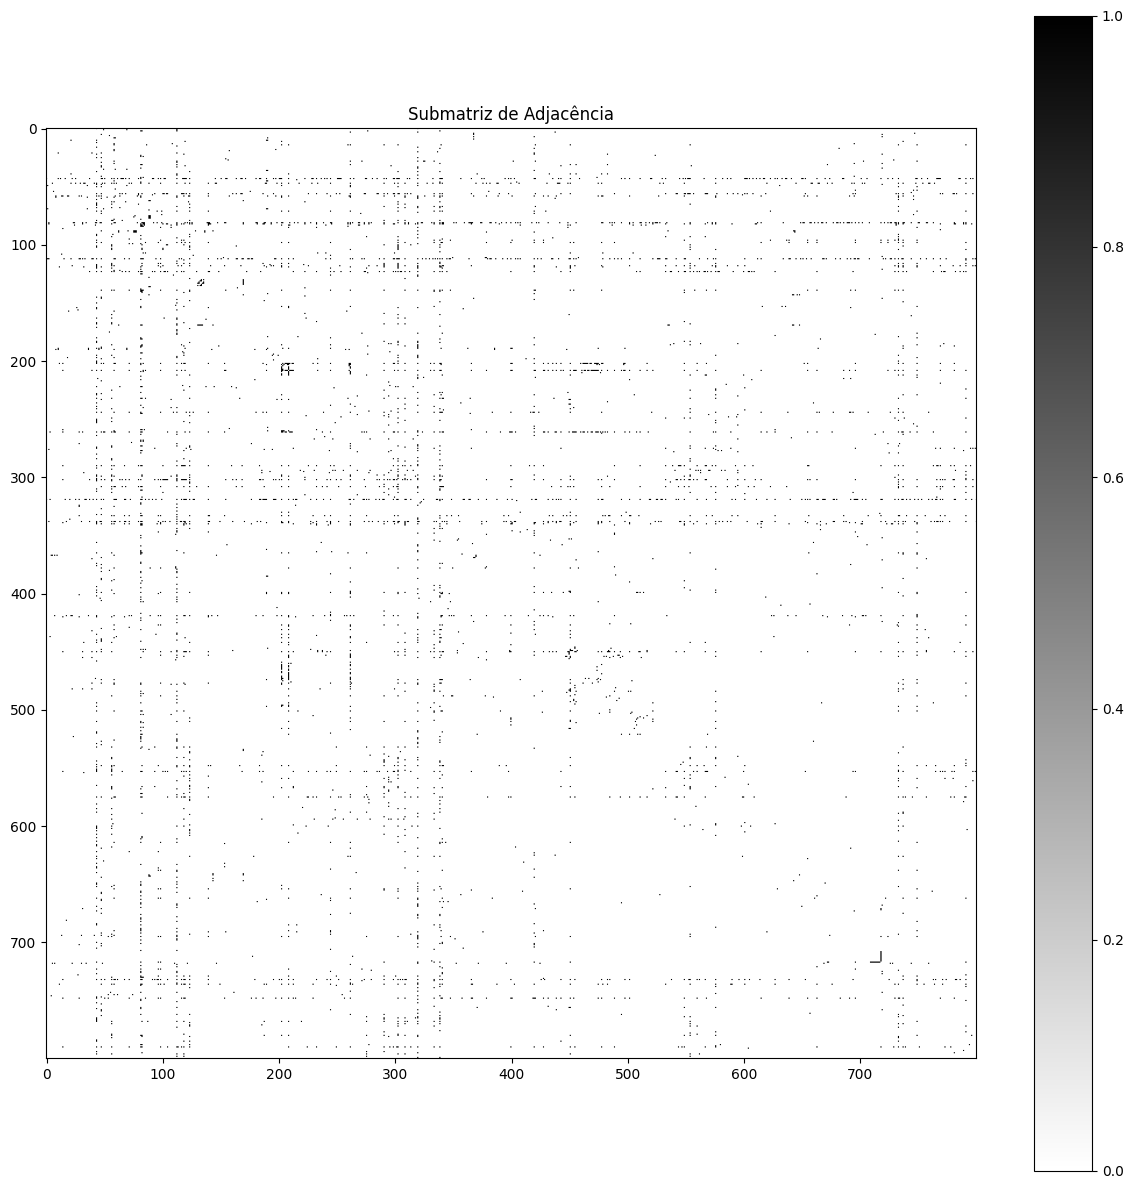

In [21]:
# Definir os índices das linhas e colunas para a submatriz
inicio_linha = 0
fim_linha = 800
inicio_coluna = 0
fim_coluna = 800

# Selecionar a submatriz com base nos índices
submatrix = adj_matrix[inicio_linha:fim_linha, inicio_coluna:fim_coluna]

# Criar uma visualização da submatriz de adjacência
plt.figure(figsize=(15, 15))
plt.imshow(submatrix, cmap='binary')
plt.title('Submatriz de Adjacência')
plt.colorbar()
plt.show()

In [10]:
print(nx.diameter(G))

17


In [23]:
# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Sort the degrees in descending order
sorted_deg = sorted(degrees, reverse=True)

# Print the sorted degrees
print(sorted_deg)

# Print the degrees
#print(degrees)

[2628, 2052, 1699, 1677, 1631, 1272, 999, 913, 695, 615, 564, 564, 540, 518, 498, 497, 487, 469, 437, 426, 417, 405, 376, 327, 327, 319, 311, 308, 292, 290, 282, 271, 239, 233, 233, 227, 222, 220, 198, 198, 194, 193, 190, 184, 182, 177, 176, 174, 169, 169, 166, 159, 156, 156, 155, 155, 154, 143, 142, 140, 135, 133, 129, 128, 127, 126, 125, 124, 123, 122, 114, 113, 111, 111, 109, 109, 108, 107, 106, 104, 104, 102, 101, 99, 99, 96, 96, 95, 94, 91, 91, 89, 89, 88, 88, 87, 87, 84, 83, 83, 83, 83, 83, 82, 82, 80, 80, 78, 77, 77, 76, 72, 72, 71, 71, 71, 71, 71, 71, 69, 69, 68, 68, 67, 67, 67, 67, 66, 65, 65, 64, 64, 63, 63, 63, 63, 62, 62, 61, 61, 61, 60, 60, 59, 59, 58, 58, 57, 57, 56, 56, 56, 56, 56, 55, 55, 55, 55, 54, 54, 54, 53, 53, 53, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 49, 49, 49, 48, 47, 47, 47, 47, 47, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41

**Densidade da rede**: 0.001523, indica uma rede de baixa densidade.

In [12]:
density = nx.density(G)

# Exibir a densidade
print("Densidade da Rede:", density)

Densidade da Rede: 0.0001523214859084934


**Assortatividade Geral da Rede**: -0,194, indica que a rede é ligeiramente disassortativa. Nós com características diferentes tendem a se conectar mais do que nós com características semelhantes.

In [19]:
assort = nx.degree_assortativity_coefficient(G)

#assortatividade geral
print("Assortatividade Geral da Rede:", assort)

Assortatividade Geral da Rede: -0.19464605369844018


**Histograma de Distribuição Empirica de Grau**

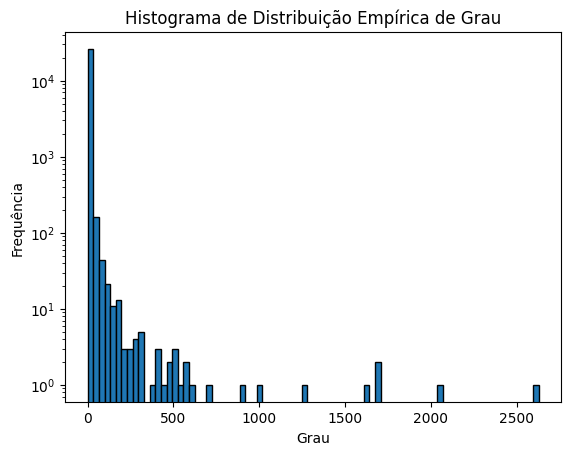

In [27]:
plt.hist(degrees, bins=80, edgecolor='black')
plt.yscale('log') #para possibilitar a visualização
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.title('Histograma de Distribuição Empírica de Grau')
plt.show()

**Coeficiente de Clustering Local**: probabilidade de que os vizinhos de um determinado nó em uma rede estejam conectados entre si.

In [76]:
#escolhendo um nó como exemplo
node = 5
clustering_coefficient = nx.clustering(G, node)
print("Coeficiente de Clustering Local para o Nó {}, grau {}: {}".format(node, G.degree[node], clustering_coefficient))


Coeficiente de Clustering Local para o Nó 5, grau 1: 0


Filtrando os nós com grau mínimo


In [69]:
min = 100  #limite mínimo de grau para seleção de nós

#filtrando
selec = [n for n, degree in G.degree() if degree >= min]
coeficientes_clustering = {}

#calculando o coeficiente de clustering local para cada nó selecionado
for node in selec:
    clustering_coeff = nx.clustering(G, node)
    coeficientes_clustering[node] = clustering_coeff

for node, clustering_coeff in sorted(coeficientes_clustering.items(), key=lambda x: x[1], reverse=True):
    print("Coeficiente de Clustering Local para o Nó {}, grau {}: {}".format(node, G.degree[node], clustering_coeff))

Coeficiente de Clustering Local para o Nó 6789, grau 124: 0.11749278783110412
Coeficiente de Clustering Local para o Nó 161, grau 128: 0.09104330708661418
Coeficiente de Clustering Local para o Nó 2411, grau 142: 0.0814104485066427
Coeficiente de Clustering Local para o Nó 1478, grau 169: 0.0695266272189349
Coeficiente de Clustering Local para o Nó 1762, grau 198: 0.06419525201251089
Coeficiente de Clustering Local para o Nó 281, grau 135: 0.06158098396904367
Coeficiente de Clustering Local para o Nó 723, grau 222: 0.060902531490766784
Coeficiente de Clustering Local para o Nó 950, grau 129: 0.05571705426356589
Coeficiente de Clustering Local para o Nó 3097, grau 233: 0.052168121947609884
Coeficiente de Clustering Local para o Nó 9417, grau 169: 0.05100028176951254
Coeficiente de Clustering Local para o Nó 1822, grau 166: 0.05074844833880979
Coeficiente de Clustering Local para o Nó 2450, grau 113: 0.04898862199747155
Coeficiente de Clustering Local para o Nó 11760, grau 177: 0.0477657

In [74]:
max = 1  #limite máximo de grau para seleção de nós

#filtrando
selec = [n for n, degree in G.degree() if degree <= max]
coeficientes_clustering = {}

#calculando o coeficiente de clustering local para cada nó selecionado
for node in selec:
    clustering_coeff = nx.clustering(G, node)
    coeficientes_clustering[node] = clustering_coeff

print(len(coeficientes_clustering))

#print(coeficientes_clustering) #1 = 9937

#exibindo
#for node, clustering_coeff in coeficientes_clustering.items():
#    print("Coeficiente de Clustering Local para o Nó {}, grau {}: {}".format(node, G.degree[node], clustering_coeff))

9937


**Coeficiente de Clustering Global**: mede a tendência de uma rede de formar clusters.

In [31]:
clustering_global = nx.average_clustering(G)

#coeficiente de clustering global
print("Coeficiente de Clustering Global: {}".format(clustering_global))

Coeficiente de Clustering Global: 0.20823287016853065


**Medidas de centralidade**

**Eigenvector**: mede o quanto nós importantes tendem a conectar com nós também importantes.



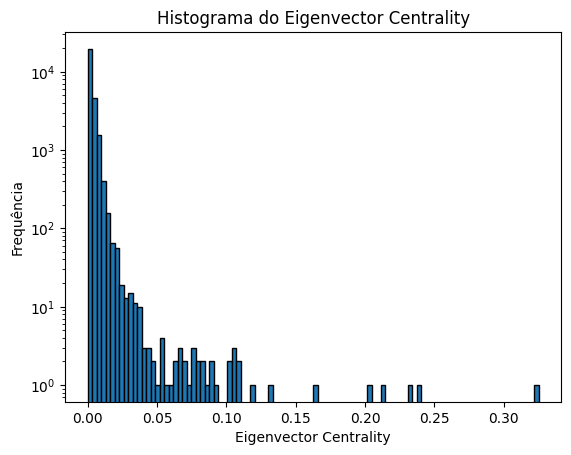

In [42]:
#eigenvector centrality elevado indica que um nó está fortemente conectado a outros nós que também são considerados importantes

eigenvector_cent = nx.eigenvector_centrality(G)
values = list(eigenvector_cent.values())

plt.hist(values, bins=100, edgecolor='black')
plt.title("Histograma do Eigenvector Centrality")
plt.yscale('log') #para possibilitar a visualização
plt.xlabel("Eigenvector Centrality")
plt.ylabel("Frequência")
plt.show()

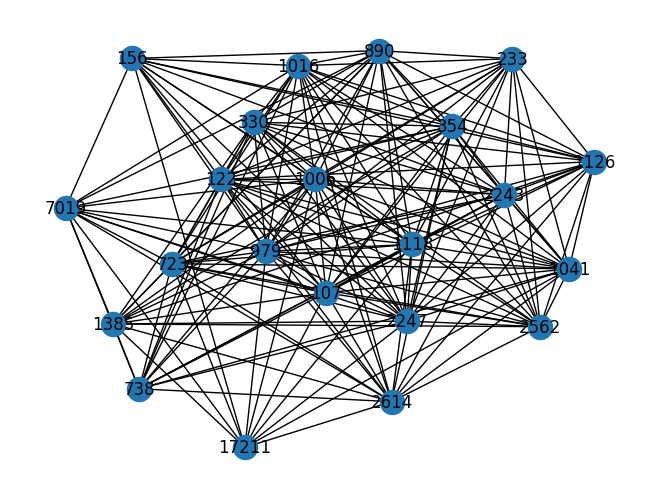

In [63]:
#eigenvector centrality

min = 0.08  #limite mínimo de eigenvector para seleção de nós

selec_eig = [node for node, centrality in eigenvector_cent.items() if centrality >= min]

#subgrafo contendo os nós selecionados e suas arestas
subgrafo = G.subgraph(selec_eig)
nx.draw(subgrafo, with_labels=True)
plt.show()

In [64]:
arestas_ordenadas = sorted(subgrafo.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

for u, v, data in arestas_ordenadas:
    peso = data['weight']
    print(f"Aresta ({u}, {v}) - Peso: {peso}")

#Analisando o peso das arestas é possível observar que não existe arestas de peso 4 no subgrafo resultado da seleção do eigenvector_centrality


Aresta (1041, 17211) - Peso: 3
Aresta (17211, 1118) - Peso: 3
Aresta (2243, 330) - Peso: 3
Aresta (2243, 354) - Peso: 3
Aresta (2247, 7019) - Peso: 3
Aresta (330, 738) - Peso: 3
Aresta (330, 890) - Peso: 3
Aresta (330, 979) - Peso: 3
Aresta (330, 1006) - Peso: 3
Aresta (330, 1016) - Peso: 3
Aresta (723, 233) - Peso: 3
Aresta (979, 233) - Peso: 3
Aresta (979, 890) - Peso: 3
Aresta (1118, 7019) - Peso: 3
Aresta (738, 122) - Peso: 3
Aresta (354, 233) - Peso: 3
Aresta (354, 890) - Peso: 3
Aresta (354, 7019) - Peso: 3
Aresta (233, 1006) - Peso: 3
Aresta (1385, 7019) - Peso: 3
Aresta (7019, 1016) - Peso: 3
Aresta (1006, 890) - Peso: 3
Aresta (1016, 890) - Peso: 3
Aresta (2562, 107) - Peso: 2
Aresta (2562, 122) - Peso: 2
Aresta (2562, 233) - Peso: 2
Aresta (2562, 330) - Peso: 2
Aresta (2562, 354) - Peso: 2
Aresta (2562, 723) - Peso: 2
Aresta (2562, 890) - Peso: 2
Aresta (2562, 979) - Peso: 2
Aresta (2562, 1016) - Peso: 2
Aresta (2562, 1041) - Peso: 2
Aresta (2562, 1118) - Peso: 2
Aresta (2562

**Degree centrality**: medida que avalia a importância de um nó em uma rede com base no número de conexões que ele possui.

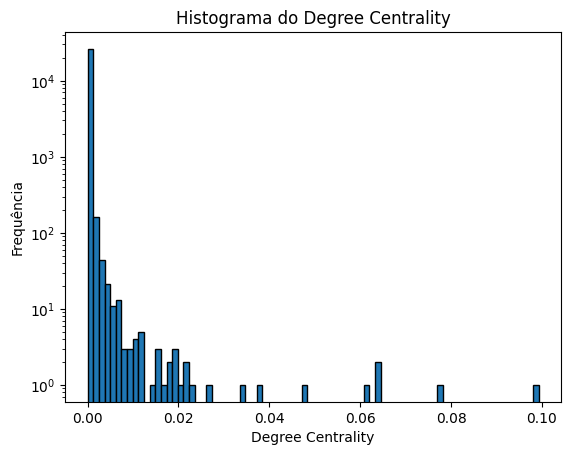

In [65]:
#degree centrality

degree_cent = nx.degree_centrality(G)
values = list(degree_cent.values())

plt.hist(values, bins=80, edgecolor='black')
plt.title("Histograma do Degree Centrality")
plt.yscale('log') #para possibilitar a visualização
plt.xlabel("Degree Centrality")
plt.ylabel("Frequência")
plt.show()

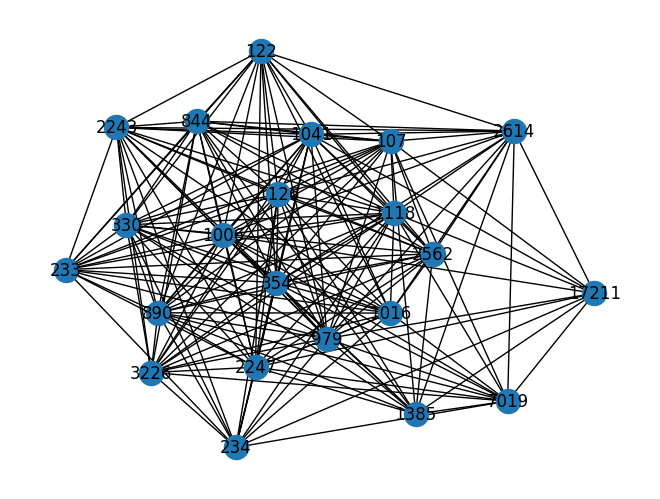

In [66]:
#degree centrality

min = 0.015 #limite mínimo de degree centrality para seleção de nós

selec_deg = [node for node, cent in degree_cent.items() if cent >= min]

#subgrafo contendo os nós selecionados e suas arestas
subgrafo = G.subgraph(selec_deg)
nx.draw(subgrafo, with_labels=True)
plt.show()

In [73]:
#comparação

from pandas.core.describe import select_describe_func
# Encontrar os nós comuns aos dois conjuntos
common_nodes = set(selec_deg) & set(selec_eig)

# Imprimir os nós comuns
for node in common_nodes:
    print("Nó:", node)

Nó: 2562
Nó: 1041
Nó: 2614
Nó: 17211
Nó: 2243
Nó: 2247
Nó: 330
Nó: 979
Nó: 1118
Nó: 354
Nó: 1126
Nó: 122
Nó: 233
Nó: 1385
Nó: 107
Nó: 7019
Nó: 1006
Nó: 1016
Nó: 890


**Closeness centrality**: medida que avalia a acessibilidade de um nó em uma rede, calculando a distância média desse nó para todos os outros nós.

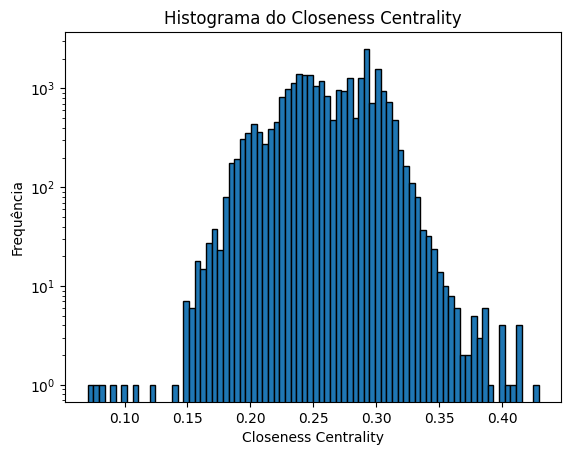

In [68]:
#closeness centrality

closeness_cent = nx.closeness_centrality(G)
values = list(closeness_cent.values())

plt.hist(values, bins=80, edgecolor='black')
plt.title("Histograma do Closeness Centrality")
plt.yscale('log') #para possibilitar a visualização
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequência")
plt.show()

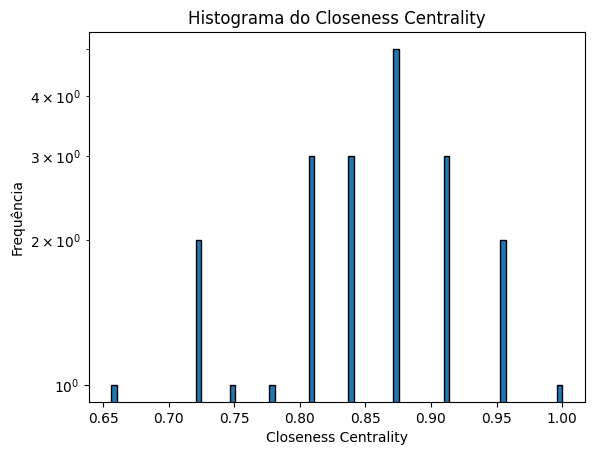

In [74]:
#closeness centrality....... teste com subgrafo

closeness_cent = nx.closeness_centrality(subgrafo)
values = list(closeness_cent.values())

plt.hist(values, bins=80, edgecolor='black')
plt.title("Histograma do Closeness Centrality")
plt.yscale('log') #para possibilitar a visualização
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequência")
plt.show()

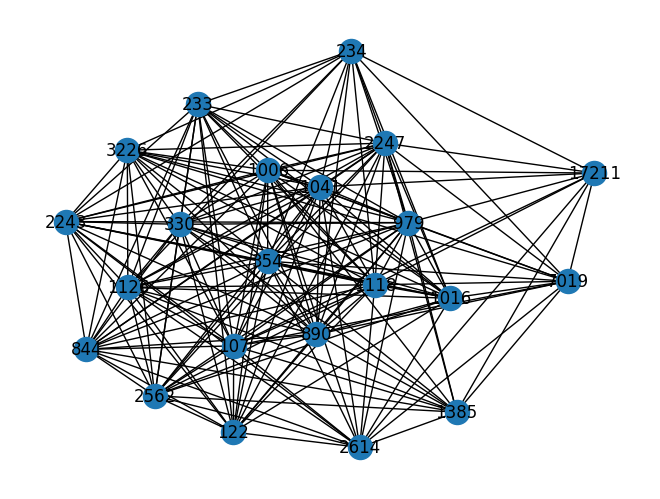

In [75]:
#closeness centrality

min = 0.015 #limite mínimo de degree centrality para seleção de nós

selec_clos = [node for node, cent in closeness_cent.items() if cent >= min]

#subgrafo contendo os nós selecionados e suas arestas
subgrafo = G.subgraph(selec_clos)
nx.draw(subgrafo, with_labels=True)
plt.show()

**Betweenness centrality**: medida que avalia a importância de um nó como ponte entre outros nós em uma rede (intermediação).

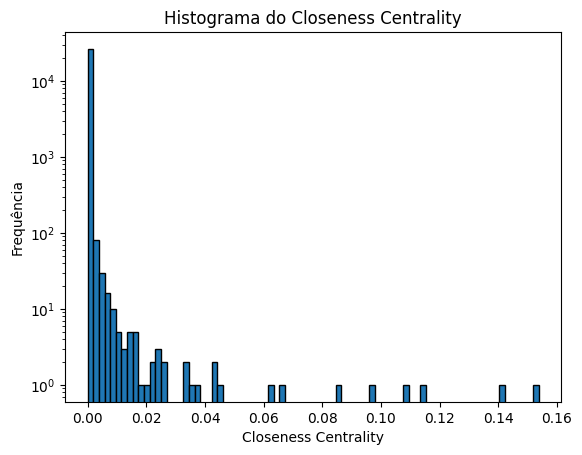

In [76]:
#betweenness centrality

betweenness_cent = nx.betweenness_centrality(G)
values = list(betweenness_cent.values())

plt.hist(values, bins=80, edgecolor='black')
plt.title("Histograma do Closeness Centrality")
plt.yscale('log') #para possibilitar a visualização
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequência")
plt.show()

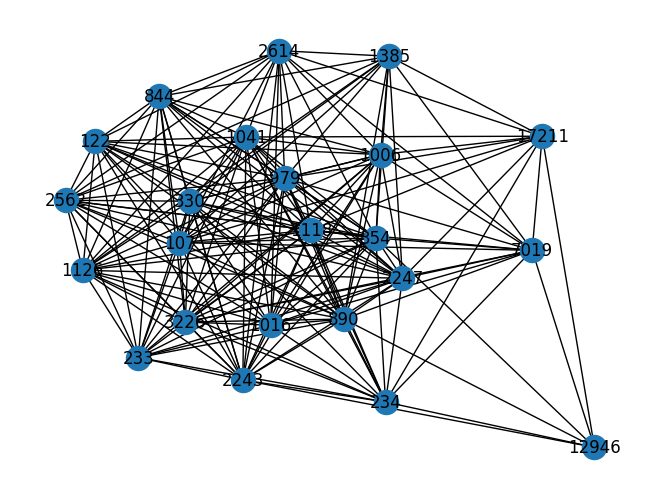

In [78]:
#betweenness centrality

min = 0.02 #limite mínimo de betweenness centrality para seleção de nós

selec_betw = [node for node, cent in betweenness_cent.items() if cent >= min]

#subgrafo contendo os nós selecionados e suas arestas
subgrafo = G.subgraph(selec_betw)
nx.draw(subgrafo, with_labels=True)
plt.show()

In [79]:
#comparação

from pandas.core.describe import select_describe_func
# Encontrar os nós comuns aos dois conjuntos
common_nodes = set(selec_deg) & set(selec_eig) & set(selec_clos) & set(selec_betw)

# Imprimir os nós comuns
for node in common_nodes:
    print("Nó:", node)

Nó: 2562
Nó: 1041
Nó: 2614
Nó: 17211
Nó: 2243
Nó: 2247
Nó: 330
Nó: 979
Nó: 1118
Nó: 354
Nó: 1126
Nó: 122
Nó: 233
Nó: 1385
Nó: 107
Nó: 7019
Nó: 1006
Nó: 1016
Nó: 890


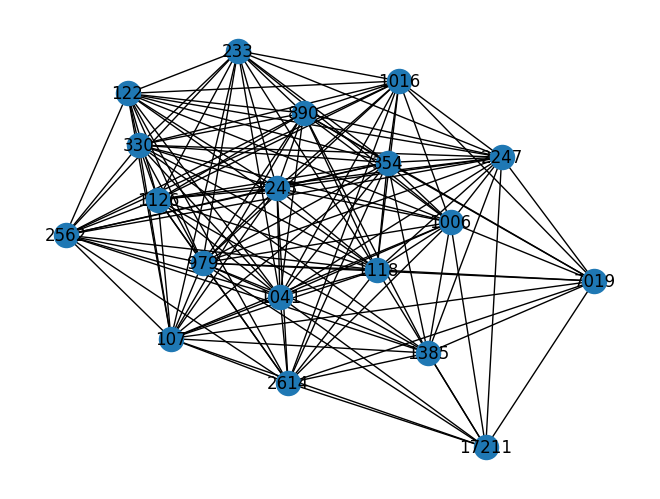

In [82]:
#criar uma lista com os nós selecionados
selected_nodes = list(common_nodes)

#criar o subgrafo contendo apenas os nós selecionados e suas arestas correspondentes
subgraph = G.subgraph(selected_nodes)

nx.draw(subgraph, with_labels=True)
plt.show()

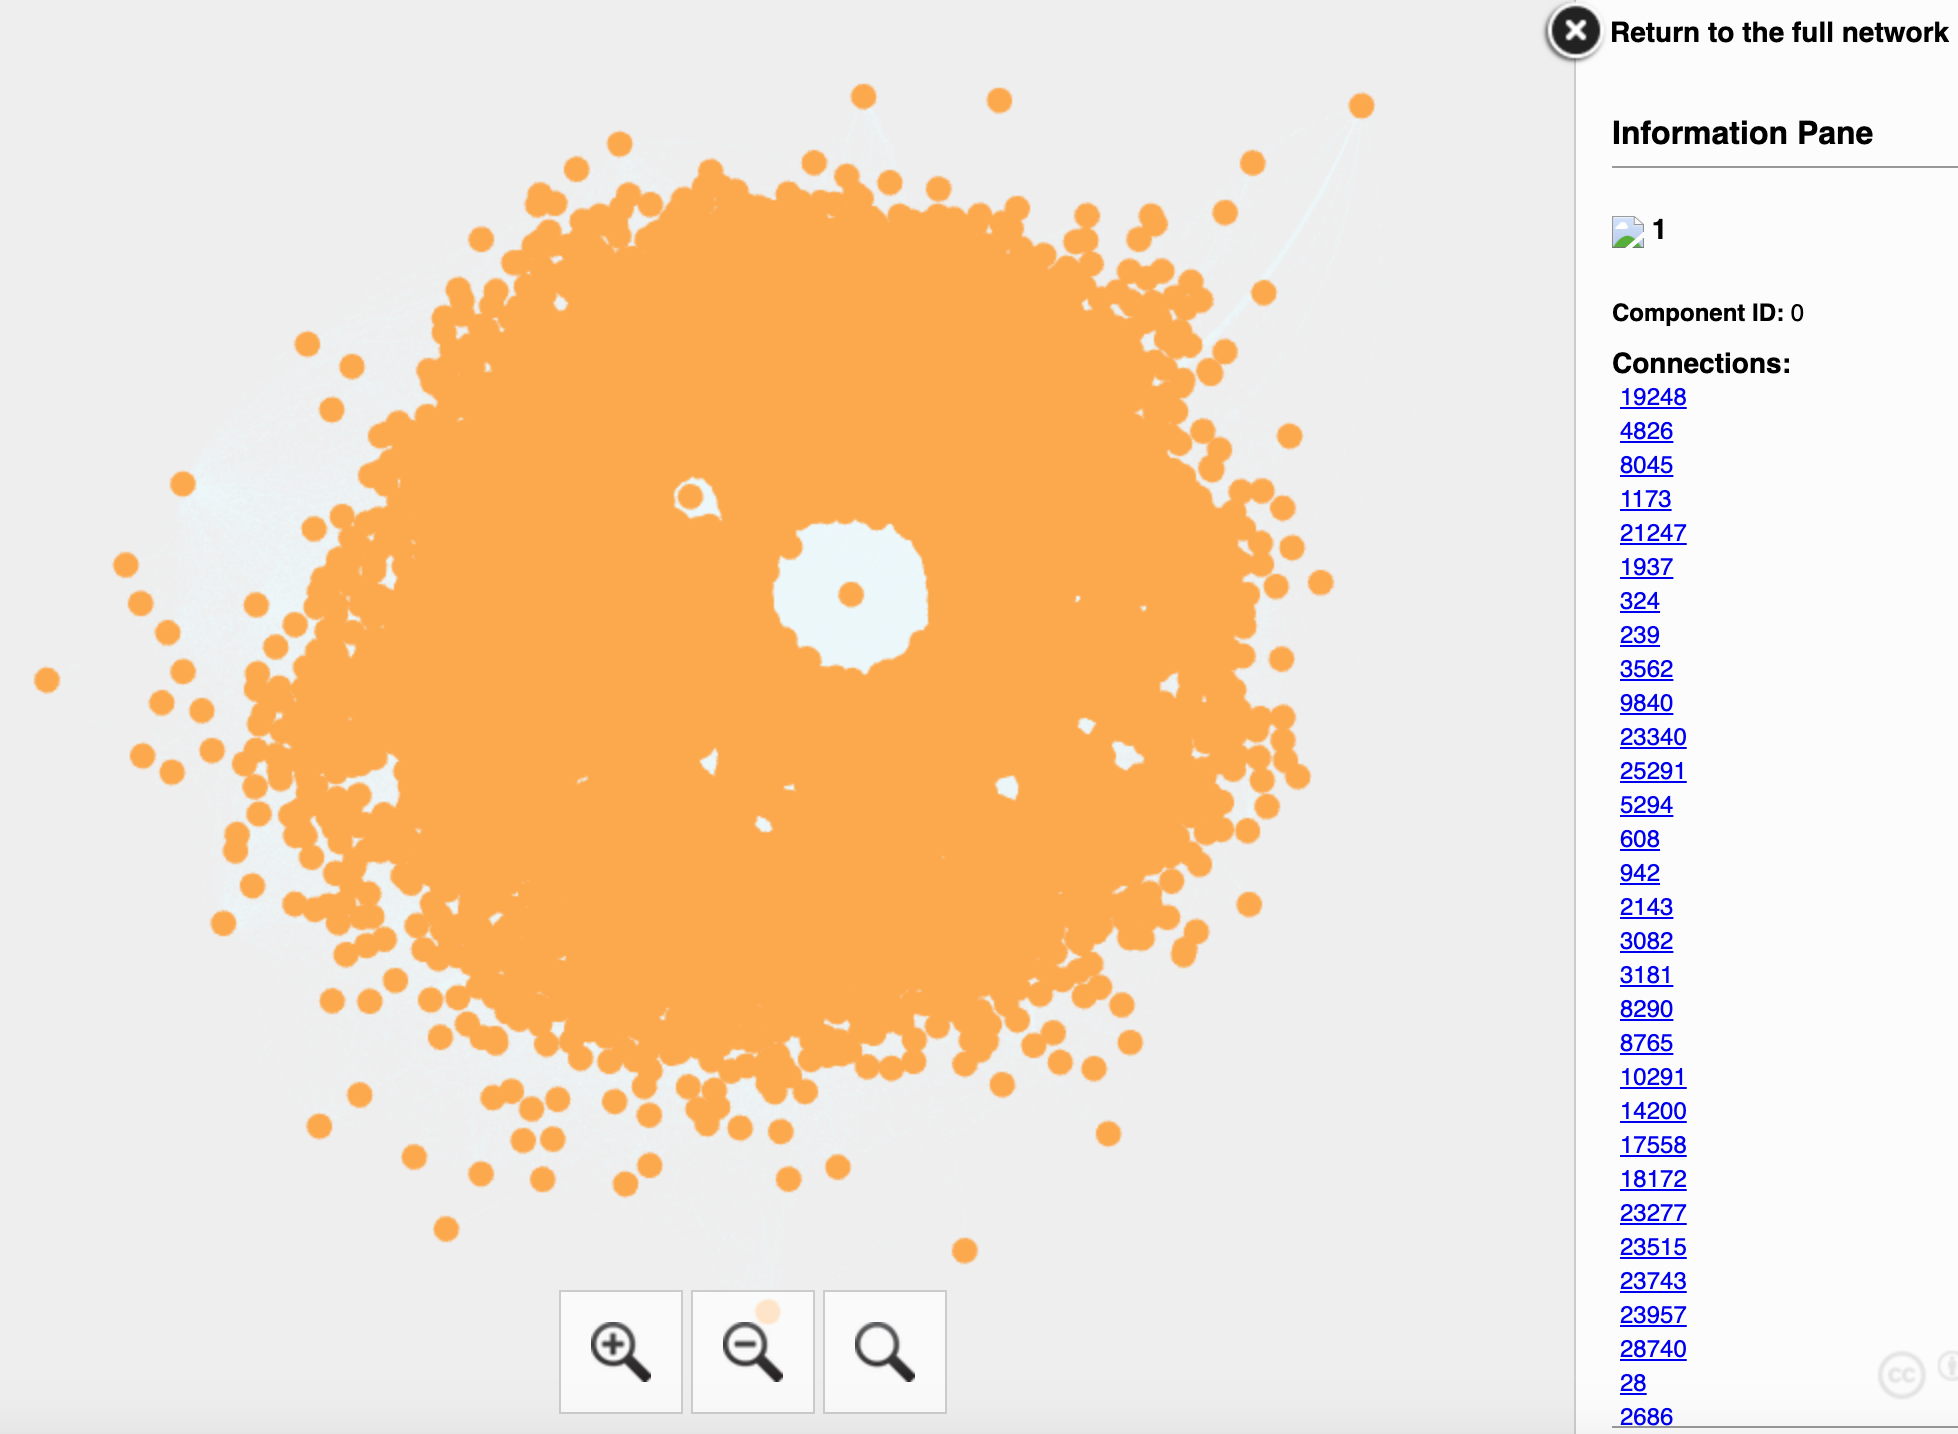

In [10]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
